# Аналитика тарифов оператора сотовой связи

# Описание проекта:

Исследование для федерального оператора сотовой связи.
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 


 # Цель:
 
 Определение перспективного тарифа для телеком компании

# Задачи: 

Предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей 


# Описание тарифов:

Тариф «Смарт»

1.	Ежемесячная плата: 550 рублей

2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

3.	Стоимость услуг сверх тарифного пакета:

    •	минута разговора: 3 рубля
    
    •	сообщение: 3 рубля
    
    •	1 Гб интернет-трафика: 200 рублей



Тариф «Ультра»

1.	Ежемесячная плата: 1950 рублей

2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

3.	Стоимость услуг сверх тарифного пакета:

    •	минута разговора: 1 рубль

    •	сообщение: 1 рубль

    •	1 Гб интернет-трафика: 150 рублей

# Примечание:

Компания всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.



# Описание данных

###### Таблица users (информация о пользователях):

•	user_id — уникальный идентификатор пользователя

•	first_name — имя пользователя

•	last_name — фамилия пользователя

•	age — возраст пользователя (годы)

•	reg_date — дата подключения тарифа (день, месяц, год)

•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

•	city — город проживания пользователя

•	tariff — название тарифного плана

###### Таблица calls (информация о звонках):

•	id — уникальный номер звонка

•	call_date — дата звонка

•	duration — длительность звонка в минутах

•	user_id — идентификатор пользователя, сделавшего звонок

###### Таблица messages (информация о сообщениях):

•	id — уникальный номер сообщения

•	message_date — дата сообщения

•	user_id — идентификатор пользователя, отправившего сообщение

###### Таблица internet (информация об интернет-сессиях):

•	id — уникальный номер сессии

•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

•	session_date — дата интернет-сессии

•	user_id — идентификатор пользователя

###### Таблица tariffs (информация о тарифах):

•	tariff_name — название тарифа

•	rub_monthly_fee — ежемесячная абонентская плата в рублях

•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

•	messages_included — количество сообщений в месяц, включённых в абонентскую плату

•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета

•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



# Оглавление:

1  [Обзор данных](#part_0)

2  [Предобработка данных](#part_1)

3  [Описание распределений](#part_2)

3.1  [Распределение тарифов Ultra и Smart](#part_3)

4  [Проверка гипотез](#part_4)



## Обзор данных: <a name="part_0"></a>

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_calls = pd.read_csv('/datasets/calls.csv')

df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)

df_messages = pd.read_csv('/datasets/messages.csv')

df_tariffs = pd.read_csv('/datasets/tariffs.csv')

df_users = pd.read_csv('/datasets/users.csv')

In [2]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
df_users.describe().T 

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [5]:
df_users.duplicated().sum()

0

In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
df_internet.duplicated().sum()

0

In [8]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [9]:
#  посмотрим на количество нулевых сессий
gaps_mb = df_internet.query('mb_used == 0')
len(gaps_mb)

19598

In [10]:
#  доля нулевых сессий

(len(gaps_mb) / len(df_internet)) *100 

13.118155773916303

In [11]:
df_messages.info()
df_messages.duplicated().sum()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
df_calls.info()
df_calls.duplicated().sum()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [13]:
# Посмотрим на пропущенные звонки

gaps_calls = df_calls.query('duration == 0')
len(gaps_calls)

39613

In [14]:
# доля пропушенных звонков

(len(gaps_calls) / len(df_calls)) *100 

19.551644316336553

# Основные выводы по данным:

Исходные данные разделены на 5 файлов: звонки, интернет сессии, сообщения, информация о пользователях, описание тарифов.
 
Столбцы с датами требует приведения к формату datetime. 

Также выявлено, что длительность некоторых звонков и интернет-сессий - 0. Скорее всего это возникло из-за пропущенных звонков, а интернет-сессии с нулевым трафиком возникли из-за того, что у оператора есть возможность не учитывать движение трафика по определенным IP-адресам.

Пропущенных звонков - 39613 (доля - 19,5%)
Нулевых интернет-сессий - 19598 (доля - 13,1% ) 
Было принято решение не удалять эту информацию, тк она может понадобиться при подсчете общего количество звонок/интернет сессий.

Согласно тарифу оператор округляет вверх значения минут и мегабайтов. Поэтом необходимо применить округление и привести к целочисленному типу эти параметры.


## Предобработка данных: <a name="part_1"></a>

In [15]:
# смена типа данных 

df_users['churn_date'] = df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
# смена типа данных 

df_users['reg_date'] = df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
df_users['month'] = df_users['reg_date'].dt.month

In [18]:
# смена типа данных 

df_internet['session_date'] = df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
df_internet['month'] = df_internet['session_date'].dt.month

In [20]:
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil) # оператор округляет "вверх"количества трафика

In [21]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
month         500 non-null int64
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


Рассчитаем объем потраченного  интернета с мегабайтах для каждого пользователя по месяцам

In [22]:
internet = df_internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum').reset_index()

In [23]:
internet.head()

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


In [24]:
# смена типа данных 

df_messages['message_date'] = df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
df_messages['month'] = df_messages['message_date'].dt.month

Рассчитаем количество отправленных сообщений для каждого пользователя по месяцам

In [26]:
messages = df_messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = ['count']).reset_index()

In [27]:
messages.columns = (['user_id', 'month','messages'])

In [28]:
messages.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [29]:
df_calls['call_date'] = df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')# смена типа данных 

In [30]:
df_calls['month'] = df_calls['call_date'].dt.month

In [31]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil) # оператор округляет "вверх" значения продолжительности звонков

Рассчитаем количество минут разговора и число звонков для каждого пользователя по месяцам

In [32]:
calls = df_calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ['count', 'sum']).reset_index() 

In [33]:
calls.columns = (['user_id', 'month','total_calls','calls_duration'])

In [34]:
calls.head()

,user_id,month,total_calls,calls_duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


Объединим таблицы со звонками, сообщениями и объемом потраченных гигабайт интернета по общим столбцам `user_id`,`month`

Таблицы с пользователями и тарифами по столбцу `user_id`

In [35]:
users_with_tariffs = df_users.merge(df_tariffs,left_on = 'tariff', right_on = 'tariff_name', how = 'left')

In [36]:
df_final = (calls.merge(internet, on =['user_id', 'month'], how = 'outer')
    .merge(messages, on = ['user_id', 'month'], how = 'outer')
    .merge(users_with_tariffs, on = 'user_id'))

df_final.drop(['month_y', 'first_name','tariff_name','last_name'],inplace = True, axis = 'columns')

In [37]:
df_final.head()

,user_id,month_x,total_calls,calls_duration,mb_used,messages,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,2256.0,22.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,23257.0,60.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,14016.0,75.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,14070.0,81.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,14581.0,57.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [38]:
#Назначим функцию для расчета ежемесячной выручки от каждого пользователя. При расчете будут учитываться превышение лимитов вне тарифного плана.

def count_fee(row):
    total_fee = 0
    if (row['calls_duration'] > row['minutes_included']):
        total_fee += (row['calls_duration'] - row['minutes_included'])* row['rub_per_minute'] 
    if (row['mb_used'] > row['mb_per_month_included']):
        total_fee += np.ceil((row['mb_used'] - row['mb_per_month_included'])/1024)* row['rub_per_gb'] 
    if (row['messages'] > row['messages_included']):
        total_fee += (row['messages'] - row['messages_included'])* row['rub_per_message']
    total_fee += row['rub_monthly_fee']    
    
    return total_fee

In [39]:
df_final['total_fee'] = df_final.apply(count_fee, axis = 1)

df_final.head()

,user_id,month_x,total_calls,calls_duration,mb_used,messages,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_fee
0,1000,5,22.0,159.0,2256.0,22.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,23257.0,60.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,14016.0,75.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,14070.0,81.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,14581.0,57.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [40]:
df_final['total_fee']  = df_final['total_fee'].astype('int') # приводим к целочисленному типу данных

In [41]:
df_final[df_final['user_id'] == 1026] # посмотрим на отдельного пользователя 

,user_id,month_x,total_calls,calls_duration,mb_used,messages,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_fee
171,1026,10,72.0,535.0,14199.0,39.0,32,NaT,Мурманск,2018-10-06,smart,50,15360,500,550,200,3,3,655
172,1026,11,61.0,469.0,12204.0,48.0,32,NaT,Мурманск,2018-10-06,smart,50,15360,500,550,200,3,3,550
173,1026,12,68.0,531.0,16560.0,57.0,32,NaT,Мурманск,2018-10-06,smart,50,15360,500,550,200,3,3,1064


## Описание распределений <a name="part_2"></a>

In [42]:
# Посмотрим отдельно на поведение клиентов в зависимости от тарифа

smart_users = df_final.query('tariff == "smart"')
ultra_users = df_final.query('tariff == "ultra"')

In [43]:
smart_users['calls_duration'].mean()  # найдем среднее значение

419.0629779577148

In [44]:
np.var(smart_users['calls_duration']) # найдем дисперсию

35828.06530953033

In [45]:
np.std(smart_users['calls_duration']) # найдем стандартное отклонение

189.2830296395594

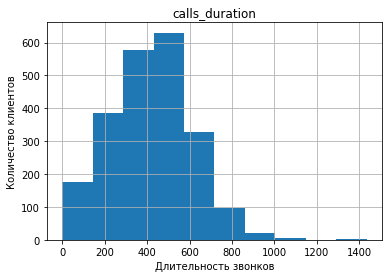

In [46]:
# Посмотрим распределение на гистограмме 

smart_calls = smart_users['calls_duration'].hist()
smart_calls.set_xlabel('Длительность звонков')
smart_calls.set_ylabel('Количество клиентов')
smart_calls.set_title('calls_duration')
plt.show()

В среднем клиенты на тарифе Smart говорят 419 минут, все разговоры в рамках тарифа Smart
Дисперсия израсходованных минут в месяц для клиента тариного плана Smart составляет - 35828.06530953033
Стандартное отклонение израсходованных минут в месяц для клиента тариного плана Smart составляет - 189.2830296395594

In [47]:
smart_users['mb_used'].mean() # найдем среднее значение

16236.47262118492

In [48]:
np.var(smart_users['mb_used'])# найдем дисперсию

34427641.479950584

In [49]:
np.std(smart_users['mb_used']) # найдем стандартное отклонение

5867.507262880088

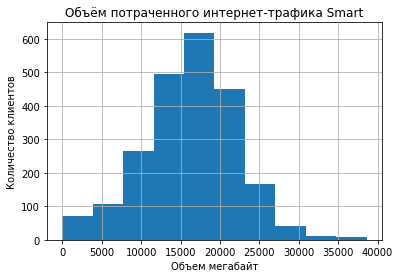

In [50]:
smart_mb = smart_users['mb_used'].hist()
smart_mb.set_xlabel('Объем мегабайт')
smart_mb.set_ylabel('Количество клиентов')
smart_mb.set_title('Объём потраченного интернет-трафика Smart')
plt.show()

В среднем клиенты на тарифе Smart тратят мегабайт больше,чем им предложено в рамках тарифного плана, средний показатель составляет - 16215
Дисперсия израсходованных минут в месяц для клиента тариного плана Smart составляет - 34344529.80091768
Стандартное отклонение израсходованных минут в месяц для клиента тариного плана Smart составляет - 5860.420616382213

In [51]:
smart_users['messages'].mean() # найдем среднее значение

38.71644120707596

In [52]:
np.var(smart_users['messages'])# найдем дисперсию

717.220843110227

In [53]:
np.std(smart_users['messages']) # найдем стандартное отклонение

26.780979129042816

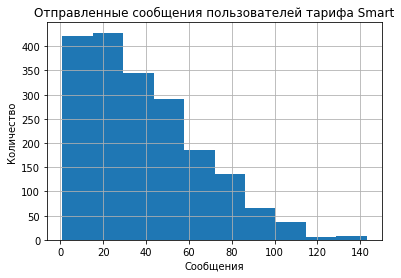

In [54]:
smart_sms = smart_users['messages'].hist()
smart_sms.set_xlabel('Сообщения')
smart_sms.set_ylabel('Количество')
smart_sms.set_title('Отправленные сообщения пользователей тарифа Smart')
plt.show()

В среднем клиенты на тарифе Smart отправляют сообщений меньше, чем предложено оператором 
Дисперсия израсходованных минут в месяц для клиента тариного плана Smart составляет - 717.220843110227
Стандартное отклонение израсходованных минут в месяц для клиента тариного плана Smart составляет - 26.780979129042816

In [55]:
ultra_users['calls_duration'].mean()  # найдем среднее значение

545.4511041009464

In [56]:
np.var(ultra_users['calls_duration']) # найдем дисперсию

94104.36117385984

In [57]:
np.std(ultra_users['calls_duration']) # найдем стандартное отклонение

306.76434143143143

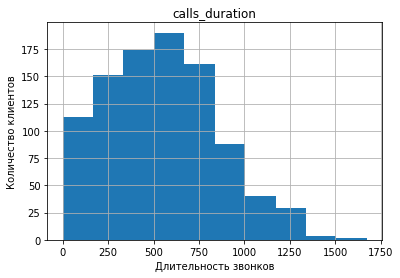

In [58]:
# Посмотрим распределение на гистограмме 

ultra_calls = ultra_users['calls_duration'].hist()
ultra_calls.set_xlabel('Длительность звонков')
ultra_calls.set_ylabel('Количество клиентов')
ultra_calls.set_title('calls_duration')
plt.show()


В среднем пользователи тарифа Ultra  таритят больше минут почти в два раза, чем предложено тарифом
Дисперсия израсходованных минут в месяц для клиента тариного плана Ultra составляет - 94104.36117385984
Стандартное отклонение израсходованных минут в месяц для клиента тариного плана Ultra составляет - 306.76434143143143

In [59]:
ultra_users['mb_used'].mean()  # найдем среднее значение

19686.76717948718

In [60]:
np.var(ultra_users['mb_used']) # найдем дисперсию

98941856.5929741

In [61]:
np.std(ultra_users['mb_used']) # найдем стандартное отклонение

9946.952125800852

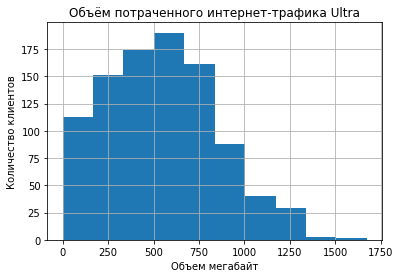

In [62]:
# Посмотрим распределение на гистограмме 

ultra_mb = ultra_users['calls_duration'].hist()
ultra_mb.set_xlabel('Объем мегабайт')
ultra_mb.set_ylabel('Количество клиентов')
ultra_mb.set_title('Объём потраченного интернет-трафика Ultra')
plt.show()


В среднем пользователи тарифа Ultra не выходят за рамки предложенного лимита, средний показатель - 19668.48526153846
Дисперсия израсходованных минут в месяц для клиента тариного плана Ultra составляет - 98762849.72293654
Стандартное отклонение израсходованных минут в месяц для клиента тариного плана Ultra составляет - 9937.949975872114

In [63]:
ultra_users['messages'].mean()  # найдем среднее значение

61.161006289308176

In [64]:
np.var(ultra_users['messages']) # найдем дисперсию

2107.0055235156838

In [65]:
np.std(ultra_users['messages']) # найдем стандартное отклонение

45.90212983637779

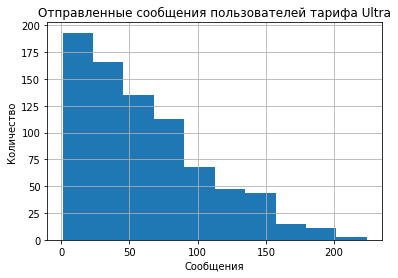

In [66]:
# Посмотрим распределение на гистограмме 
ultra_sms = ultra_users['messages'].hist()
ultra_sms.set_xlabel('Сообщения')
ultra_sms.set_ylabel('Количество')
ultra_sms.set_title('Отправленные сообщения пользователей тарифа Ultra')
plt.show()


В среднем пользователи тарифа Ultra не выходят за рамки предложенного лимита, средний показатель - 61
Дисперсия израсходованных минут в месяц для клиента тариного плана Ultra составляет - 2107.0055235156838
Стандартное отклонение израсходованных минут в месяц для клиента тариного плана Ultra составляет - 45.90212983637779

###  Распределение тарифов Ultra и Smart:<a name="part_3"></a>

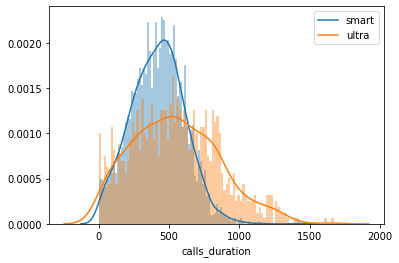

In [67]:
sns.distplot(smart_users['calls_duration'], bins = 100, kde_kws = {'label':'smart'})
sns.distplot(ultra_users['calls_duration'], bins = 100, kde_kws = {'label':'ultra'})
plt.show()

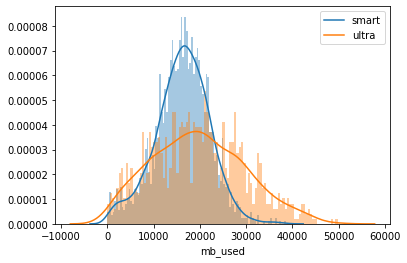

In [68]:
sns.distplot(smart_users['mb_used'], bins = 100, kde_kws = {'label':'smart'})
sns.distplot(ultra_users['mb_used'], bins = 100, kde_kws = {'label':'ultra'})
plt.show()

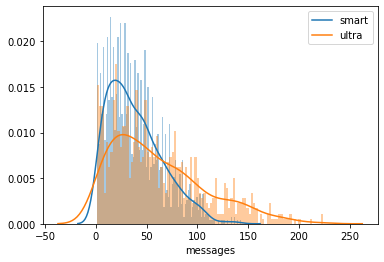

In [69]:
sns.distplot(smart_users['messages'], bins = 100, kde_kws = {'label':'smart'})
sns.distplot(ultra_users['messages'], bins = 100, kde_kws = {'label':'ultra'})
plt.show()

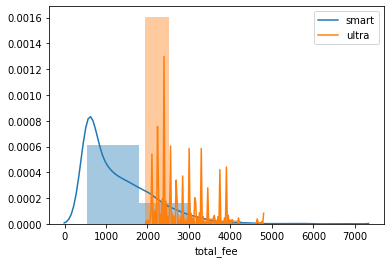

In [70]:
sns.distplot(smart_users['total_fee'],bins = 5, kde_kws = {'label':'smart'})
sns.distplot(ultra_users['total_fee'],bins = 5, kde_kws = {'label':'ultra'})
plt.show()

## Проверка гипотез <a name="part_4"></a>

Начнем с формулировки нулевой гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.
Альтернативная гипотеза  для этой H-0 звучит как средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [71]:
ultra_mean = ultra_users['total_fee']
smart_mean = smart_users['total_fee']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    ultra_mean, 
    smart_mean)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, мы можем принять альтернативную - средние выручки пользователей тарифов различны. 
Подтвердим альтернатвную гипотезу и посмотрим на цифры:

In [72]:
ultra_users['total_fee'].mean()

2071.0659898477156

In [73]:
smart_users['total_fee'].mean()

1294.6393001345896

Выручка пользователей тарифного плана Ultra на ~60% больше, чем от пользователей Smart

In [74]:
#Посмотрим отдельно на пользователей Москвы и из других регионов

moscow_users = df_final.query('city == "Москва"')
region_users = df_final.query('city != "Москва"')

Начнем с формулировки нулевой гипотезы: средняя выручка пользователей из Москвы равна выручки пользователей из других регионов. 

Альтернативная гипотеза для этой H-0 звучит как средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [75]:
moscow_mean = moscow_users['total_fee']
region_mean = region_users['total_fee']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(moscow_mean, region_mean, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергается, а значит необходимо отвергнуть альтернативную гипотезу о том, что выручики по Москве и других регионов равны. Подтвердим нулевую гипотезу:

In [76]:
moscow_users['total_fee'].mean()

1550.8052373158755

In [77]:
np.var(moscow_users['total_fee'])

565256.3794161058

In [78]:
region_users['total_fee'].mean()

1528.3169419900116

In [79]:
np.var(region_users['total_fee'])

656514.2841040562

Действительно, разница выручики по Москве и других регионов не значительна.

# Общий вывод <a name="part_5"></a>

В ходе обработки полученных данных было расчитано количество сделанных звонков и израсходованных минут разговора, отправленных сообщений и объем израсходованного интернет-трафика по месяцам. Был добавлен столбец с ежемесячной выручкой для каждого клиента. 

Для определения лучшего тарифа полученные величины были сгруппированы по тарифам. Распределения данных были описаны посредствам среднего, дисперсии, стандартного отклонения, а так же с помощью гистограмм. Больше всего запросам пользователей отвечает тарифный план Smart, клиенты пользуются предложенными тарифами, и практически не выходят за лимиты тарифа, либо выходят, но не значительно (трафик интернет-сессии).
Пользователи тарифа Ultra значительно превышают лимит предложенный операторам по минутам разговора. Лимит интернет-сессии и сообщений пользователями не превышается.
Выручка от пользователей тарифного плана Ultra выше на 60%, чем тарифного плана Smart.

Также в ходе исследования были проверены 2 гипотезы:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Первая гипотеза была принята, действительно, выручка от пользователей тарифного плана Ultra выше на 60%. Вторая опровергнута, разница выручки по Москве и других регионов не значительна.
